In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [4]:
!ls /Users/johnny/data/nlp/microblog_conversation/

TREC.data               microblogs.zip          trectweets.json
US_Election.data        trec.csv                us_election.csv
conversation_README.txt trectweets.csv          us_election.json


In [5]:
!head /Users/johnny/data/nlp/microblog_conversation/US_Election.data

In [6]:
data_dir= '/Users/johnny/data/nlp/microblog_conversation/'

# Prepare data to download from twitter API

In [20]:
cols = ['conv_id' , 'id', 'reply_to_id']
path = os.path.join(data_dir, 'Trec.data')
ds = pd.read_csv(path, sep='\t', skiprows=1, names=cols, dtype=object)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 3 columns):
conv_id        38999 non-null object
id             38999 non-null object
reply_to_id    31499 non-null object
dtypes: object(3)
memory usage: 914.1+ KB


In [10]:
ds.head()

,conv_id,id,reply_to_id
0,0,5621079719,NaN
1,0,34089140559544320,5621079719
2,1,5911874749,NaN
3,1,31744611152039936,5911874749
4,2,6496465397,NaN


In [11]:
ds.conv_id.nunique()

7500

In [12]:
ds.id.nunique(), ds.reply_to_id.nunique()

(38999, 31188)

In [13]:
ds[ds.reply_to_id.isin(ds.id)].reply_to_id.nunique()

31188

In [35]:
path=os.path.join(data_dir, 'us_election.csv')
ds[['id']].to_csv(path, index=False)

# EDA

In [16]:
path = os.path.join(data_dir, 'trectweets.csv')
tweets = pd.read_csv(path, dtype=object)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34827 entries, 0 to 34826
Data columns (total 5 columns):
id                       34827 non-null object
screen_name              34827 non-null object
text                     34827 non-null object
in_reply_to_status_id    27174 non-null object
created_at               34827 non-null object
dtypes: object(5)
memory usage: 1.3+ MB


In [26]:
tmp = ds.merge(tweets, on='id', how='left')
tmp.shape

(38999, 7)

In [30]:
tmp[tmp.text.isnull()].groupby('conv_id').size().shape

(1704,)

In [31]:
tmp[tmp.text.isnull()].head()

,conv_id,id,reply_to_id,screen_name,text,in_reply_to_status_id,created_at
5,2,31777629853974528,6496465397,NaN,NaN,NaN,NaN
11,5,31753376664522752,10093975476,NaN,NaN,NaN,NaN
35,17,32354342744891392,24438878928,NaN,NaN,NaN,NaN
37,18,31450190732861440,25226069559,NaN,NaN,NaN,NaN
45,22,2948878097711104,2948510282420225,NaN,NaN,NaN,NaN


In [36]:
tmp[tmp.conv_id=='2']

,conv_id,id,reply_to_id,screen_name,text,in_reply_to_status_id,created_at
4,2,6496465397,NaN,planetjedward,Hi guys we are finally on Twitter how are you ...,NaN,Wed Dec 09 13:45:06 +0000 2009
5,2,31777629853974528,6496465397,NaN,NaN,NaN,NaN


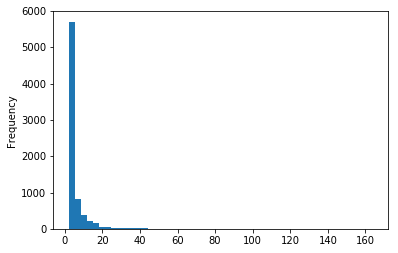

In [38]:
tmp.groupby('conv_id').size().plot.hist(bins=50)

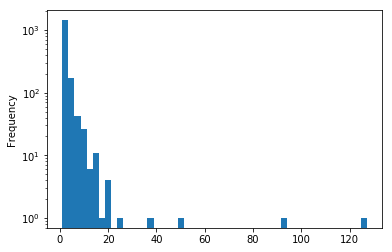

In [40]:
tmp[tmp.text.isnull()].groupby('conv_id').size().plot.hist(bins=50)
plt.yscale('log')

In [41]:
tmp[~tmp.conv_id.isin( tmp[tmp.text.isnull()].conv_id )].shape

(30053, 7)

we need to filter conversations with deleted tweets

In [42]:
path = os.path.join(data_dir, 'trec.csv')
dsfinal = tmp[~tmp.conv_id.isin( tmp[tmp.text.isnull()].conv_id )]
dsfinal.to_csv(path, index=False)

In [44]:
dsfinal.head()

,conv_id,id,reply_to_id,screen_name,text,in_reply_to_status_id,created_at
0,0,5621079719,NaN,justinbieber,i stink at math! ughhh.,NaN,Wed Nov 11 15:24:12 +0000 2009
1,0,34089140559544320,5621079719,osnapxari,@justinbieber don't worry we all do :) follow me,5621079719,Sun Feb 06 03:20:59 +0000 2011
2,1,5911874749,NaN,LeaMichele,Omg Vampire Diaries this week!?!? Who saw it??...,NaN,Sat Nov 21 05:27:34 +0000 2009
3,1,31744611152039936,5911874749,gleekR5fan4life,@msleamichele haha I luv tht show....addicting,5911874749,Sun Jan 30 16:04:39 +0000 2011
6,3,7135277765,NaN,justinbieber,#itsabieberthing when you have the greatest fa...,NaN,Mon Dec 28 21:24:15 +0000 2009
